0.4999762619862511
0.5000211101337512
0.49997381437727734
0.49999114077459256
0.49999868367432454
0.4999680080846996
0.49998502777006487
0.4999568321374474
0.4999624171745878
0.49997574169716363
0.5000189810314181
0.49995218598410796
0.49997976807064215
0.49995815790133374
0.49993320544458836
0.4999974012904118
0.499948518796513
0.49996872909871926
0.499990151374754
0.4999928483915533
0.49997210612905435
0.5000215968533382
0.5000606875866005
0.500005010093695
0.4999770670175819
0.4999669038389214
0.49997625632678716
0.4999776145179325
0.5000122156690713
0.4999975128952161
0.4999986970685442
0.49998018781623443
0.5000081361512798
0.5000262213609497
0.499981934811263
0.4999895674708541
0.5000079295778928
0.5000201076502346
0.4999725833099827
0.5000032405267815
0.4999396717097303
0.4999702810575933
0.5000353230260994
0.4999828182638097
0.4999811022963209
0.4999624659278545
0.49996298610844914
0.49999955927596873
0.4999492043918943
0.4999613576543463


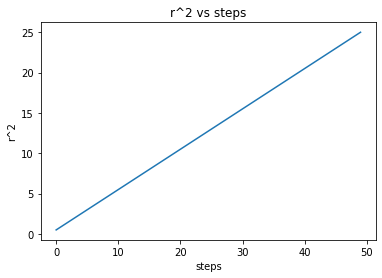

In [6]:
# Exercise 1
from mpl_toolkits import mplot3d
from matplotlib import pylab as plt
import numpy as np
N = 10000 # Number of walkers
M = 50 # Number of steps
m = np.arange(50)
r2 = []
avg = 0
# Looping over steps and walkers
for j in range(M):
    rx = []
    for i in range(N):
        phi = 2*np.pi*np.random.rand(N)
        theta1 = np.arccos(1 - 2*np.random.rand(N))
        theta2 = np.pi*np.random.rand(N)
    
        x1 = np.sin(theta1)*np.cos(phi)
        y1 = np.sin(theta1)*np.sin(phi)
        z1 = np.cos(theta1)
    
        x2 = np.sin(theta2)*np.cos(phi)
        y2 = np.sin(theta2)*np.sin(phi)
        z2 = np.cos(theta2)
    
        x1rms = np.sqrt(np.mean(x1**2))
        y1rms = np.sqrt(np.mean(y1**2))
        z1rms = np.sqrt(np.mean(z1**2))
    
        x2rms = np.sqrt(np.mean(x2**2))
        y2rms = np.sqrt(np.mean(y2**2))
        z2rms = np.sqrt(np.mean(z2**2))
        rx.append(x2rms)
    avg += np.mean(rx)
    r2.append(avg)
    print(np.mean(rx))
# Graphing
plt.title('r^2 vs steps')
plt.xlabel('steps')
plt.ylabel('r^2')
plt.plot(m,r2)
plt.show()
# The proportionality constant I found is .5, this constant relates r^2 to t

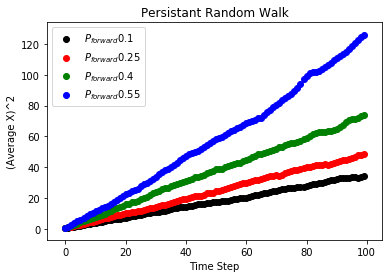

In [2]:
# Exercise 2
# Using numpy
# Practice using random walks in 2D
import numpy as np
import random as rd
from matplotlib import pylab as plt
def num2():
    N=1000 # Number of random walkers
    M=100 # Number of steps
    list=[0.1,0.25,0.4,0.55]
    colors=['black','red','green','blue']
    for k in np.arange(len(list)):
        walkers = np.zeros((N,3))#store walker positon in cartesian
       
        Pf=list[k]
        Pnf=(1-Pf)/3
       
        stepsize=1
        weights=np.array([0,0,0,0],dtype=np.float32)# defining weights
       
        for i in np.arange(M):
            for j in np.arange(N):
                weights[:]=Pnf
                weights[int(walkers[j,2])]=Pf #reset weights
                if i==0:
                    weights[:]=0.25
               
           
                direction=rd.choices([0,1,2,3],weights=weights)[0] #what random direction?
               
                walkers[j,0]+=stepsize*round(np.cos(direction*np.pi/2)) #take your steps
                walkers[j,1]+=stepsize*round(np.sin(direction*np.pi/2))
           
                walkers[j,2]=direction
            
            xav=np.mean(walkers[:,0]**2)
            if i==0:
                plt.scatter(i,xav,color=colors[k],label='$P_{forward}$'+'{}'.format(Pf))
            else:
                plt.scatter(i,xav,color=colors[k])
num2()
plt.legend() 
plt.title('Persistant Random Walk')
plt.ylabel('(Average X)^2')
plt.xlabel('Time Step')
plt.show()
# The average X^2 increases as you increase the probability of taking a step forward

0.00056
0.00032
1.7499999999999998


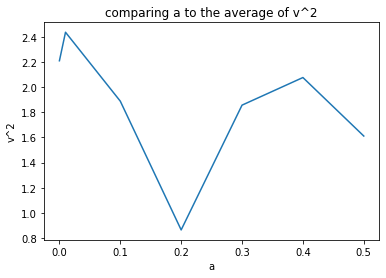

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import random
# Using the monte carlo integration method in the book on page 466
def f(v):
    a = 0.5
    return (v**2/np.sqrt(1+a*v**2))*np.exp((-(v-10)**2)/100)
N = 100000
count = 0
for i in range(N):
    x = 100000*random.random()
    y = random.random()
    if y<f(x):
        count += 1
I1 = 2*count/N
print(I1)
def f(v):
    a = 0
    return (1/np.sqrt(1+a*v**2))*np.exp((-(v-10)**2)/100)
N = 100000
count = 0
for i in range(N):
    x = 100000*random.random()
    y = random.random()
    if y<f(x):
        count += 1
I2 = 2*count/N
print(I2)
print(I1/I2)
# Putting values of v^2 into arr with the corresponding a values ran with code
a = [0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
arr = [2.2105, 2.437499, 1.8888, .86363, 1.8571, 2.0769, 1.61111]
# Graphing
plt.plot(a,arr)
plt.xlabel('a')
plt.ylabel('v^2')
plt.title('comparing a to the average of v^2')
plt.show()
# Theres not much of a pattern here, but we can see two peaks in the graph shown. 
# There is some interesting behavior when it starts to increase after a = 0.2, which 
# I didn't expect to happen

In [4]:
# Exercise 4 (10.8)
# To obtain the probability distribution, we divide the weighting function 
# given in the problem by the normalized integral of the weighting function. Thus this gives us
# 1/2*sqrt(x)
# To obtain the transformation formula that will give us our random numbers,
# we must integrate the probability distribution from 0 to x. This thus gives us sqrt(x) = random number or
# x = (random number)^2
import numpy as np
# Integrating here from 0 to 1
g = lambda x: 1/(np.exp(x)+1)
I = lambda N: 2*np.sum(g((np.random.uniform(0,1,N))**2))/N
print(I(1000000))
# The value obtained is very close to .84

0.8389825612212237


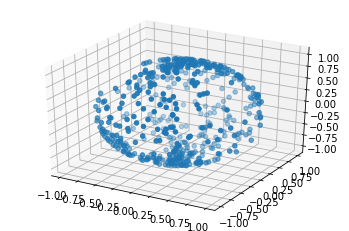

In [5]:
# Exercise 5 (10.12)
# The range of theta is from 0 to pi
# The range of phi is form 0 to 2pi
# The transformation formula for theta is x = arccos(1-2r)
# The transformation formula for phi is x = 2pir
import numpy as np
import math
from mpl_toolkits import mplot3d
from matplotlib import pylab as plt
N = 500
rnumt=[]
for r in np.random.uniform(0,1,N):
    rnumt.append(math.acos(1-2*r))
rnump = 2*np.pi*np.random.uniform(0,1,N)
# Putting spherical into cartesian coordinates
xt = []
yt = []
xp = []
yp = []
z = []
for t in rnumt:
    xt.append(np.cos(t))
    yt.append(np.sin(t))
for p in rnump:
    xp.append(np.sin(p))
    yp.append(np.sin(p))
    z.append(np.cos(p))
X = []
Y = []
Z = []
for i in range(N):
    X.append(xt[i]*xp[i])
    Y.append(yt[i]*yp[i])
    Z.append(z[i])
# Plotting globe
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X,Y,Z)
# Plots a globe using matplotlibs 3d package